In [1]:
#predict employee churn:
#churn means quit service or not

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#First Load dataset
df=pd.read_csv("employee_data.csv")
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [4]:
df.shape

(11582, 10)

In [5]:
df["quit"].unique()

array([1, 0], dtype=int64)

In [6]:
#here output column is quit and it has categorical data, so need to perform classification

In [7]:
#chcek the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11581.000000
mean,0.628308,0.716608,3.802884,200.523053,3.305215,0.152651,0.172682,0.013816
std,0.241985,0.168828,1.169843,48.839268,1.209369,0.359666,0.377988,0.116731
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
#need to fill the null values
a=df["promotion_last_5years"].mean()
a
df["promotion_last_5years"].fillna(a,inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               1
salary                   1
dtype: int64

In [11]:
#checking frequency to null values in object type data
df["department"].value_counts()
df["department"].fillna("sales",inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   1
dtype: int64

In [12]:
#checking frequency to null values in object type data
df["salary"].value_counts()
df["salary"].fillna("low",inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

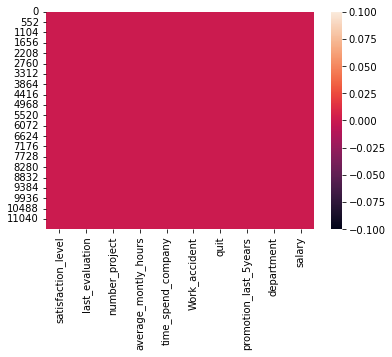

In [13]:
#visualize the null values 
sns.heatmap(df.isnull())
plt.show()

In [14]:
#chcek duplicate values
df.duplicated().sum()

9

In [15]:
#droping duplicate values
df.drop_duplicates(inplace=True)

In [16]:
#chcek duplicate values again
df.duplicated().sum()

0

In [17]:
#chcek if output is balanced or not
df["quit"].value_counts()

0    9582
1    1991
Name: quit, dtype: int64

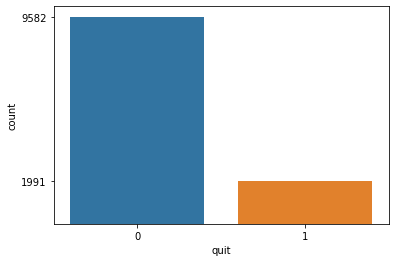

In [18]:
sns.countplot(data=df,x="quit")
f=df["quit"].value_counts()
plt.yticks(f)
plt.show()

In [19]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [20]:
#data is unbalanced 
#splitting the data 
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes("int64","float64")
df_num.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,quit
0,2,157,3,0,1
1,5,262,6,0,1
2,7,272,4,0,1
3,5,223,5,0,1
4,2,159,3,0,1


In [21]:
#apply LabelEncoder on df_cat
from sklearn.preprocessing import LabelEncoder
columns=df_cat.columns
for col in columns:
  #create object
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])

In [22]:
df_cat.head()

,department,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1


In [23]:
#concatenate df_cat and df_num
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,quit,department,salary
0,2,157,3,0,1,7,1
1,5,262,6,0,1,7,2
2,7,272,4,0,1,7,2
3,5,223,5,0,1,7,1
4,2,159,3,0,1,7,1


In [24]:
#splitting input and output
x=df_new.drop("quit",axis=1)
y=df["quit"]

In [25]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8101, 6), (3472, 6), (8101,), (3472,))

In [27]:
#first RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [28]:
#from sklearn.preprocessing import StandardScaler
#creating object for StandardScaler class
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [29]:
#to convert minority class into majority class
#use RandomOverSampler
ros=RandomOverSampler(random_state=1)

In [30]:
#apply oversampler on training data
x_trainros,y_trainros=ros.fit_resample(x_train,y_train)

In [31]:
y_trainros.value_counts()

1    6738
0    6738
Name: quit, dtype: int64

In [32]:
x_trainros.shape,y_trainros.shape

((13476, 6), (13476,))

In [33]:
#also apply oversampler on testing data
x_testros,y_testros=ros.fit_resample(x_test,y_test)

In [34]:
#apply logistic algorithm

In [35]:
#import LogisticRagresion
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [36]:
#create function
def create_model(model):
    #train the model with70% data
    model.fit(x_trainros,y_trainros)
    #test the model with 30% data
    y_pred=model.predict(x_testros)
    #genrate the report
    print(classification_report(y_testros,y_pred))
    print(confusion_matrix(y_testros,y_pred))
    return model

#import libraries
from sklearn.metrics import classification_report,confusion_matrix
#call the function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2844
           1       0.74      0.84      0.79      2844

    accuracy                           0.77      5688
   macro avg       0.78      0.77      0.77      5688
weighted avg       0.78      0.77      0.77      5688

[[2017  827]
 [ 459 2385]]


In [37]:
#conclusion: here logistic regression gives score of 1 & 0 as 0.84 & 0.71 respectively

In [38]:
#now applying decision tree aglorithm for gini index
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method

In [39]:
#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2844
           1       0.95      0.81      0.88      2844

    accuracy                           0.89      5688
   macro avg       0.90      0.89      0.89      5688
weighted avg       0.90      0.89      0.89      5688

[[2730  114]
 [ 529 2315]]


In [40]:
#to see imp features ,menas IG of each input 
dt.feature_importances_

array([0.24575817, 0.31915415, 0.37678333, 0.0038714 , 0.03188415,
       0.0225488 ])

In [41]:
dict={'Input':x.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1

,Input,IG
0,number_project,0.245758
1,average_montly_hours,0.319154
2,time_spend_company,0.376783
3,Work_accident,0.003871
4,department,0.031884
5,salary,0.022549


In [42]:
#to arrange records in desc -> highest to lowest 
df9=df1.sort_values('IG',ascending=False,ignore_index=True)
df9

,Input,IG
0,time_spend_company,0.376783
1,average_montly_hours,0.319154
2,number_project,0.245758
3,department,0.031884
4,salary,0.022549
5,Work_accident,0.003871


In [43]:
#1. max_depth parameter 

In [44]:
#apply pruning technique for DTC using entropy
#max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)
# call function
dt1=create_model(dt1)



              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2844
           1       0.91      0.94      0.92      2844

    accuracy                           0.92      5688
   macro avg       0.92      0.92      0.92      5688
weighted avg       0.92      0.92      0.92      5688

[[2581  263]
 [ 176 2668]]


In [45]:
#1. min_samples
#create object of DecisionTreeClassifier class and pass the arguments
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples leaf:",i)
    #call the function 
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call the function 
dt2=create_model(dt2)


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2844
           1       0.94      0.93      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2667  177]
 [ 193 2651]]


In [46]:
#conclusion : 
#Decision Tree Classifier with GINI Index : 1 is 0.81 and 0 is 0.96
#applied Pruning Tech : 1. max_depth with GINI INDEX then got 
#Accurancy  1 is 0.94   and 0 is 0.91  and max_depth=4
#but applied pruning tech. 2. min_samples_leaf with GINI INDEX then got 
#Accurancy  1: 0.93   and 0 : 0.94  and min_samples_leaf=45

In [47]:
# create a tree again
'''
from sklearn import tree

# Inputs are in columns
features=x.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt2,feature_names=features,filled=True)
'''


'\nfrom sklearn import tree\n\n# Inputs are in columns\nfeatures=x.columns\nplt.figure(figsize=(10,10))\n_=tree.plot_tree(dt2,feature_names=features,filled=True)\n'

In [48]:
#apply decision tree aglorithm for entropy index
#first create object for DecisionTreeClassifier class and 
#passing the parameter criterion ="entropy" by deafalut criterion="gini index" if didn't give
dt=DecisionTreeClassifier(random_state=1,criterion="entropy")
#not apply pruning technique

#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2844
           1       0.96      0.82      0.88      2844

    accuracy                           0.89      5688
   macro avg       0.90      0.89      0.89      5688
weighted avg       0.90      0.89      0.89      5688

[[2735  109]
 [ 517 2327]]


In [49]:
#apply pruning technique for DTC using entropy
#max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''

dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=4)
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2844
           1       0.91      0.94      0.93      2844

    accuracy                           0.92      5688
   macro avg       0.92      0.92      0.92      5688
weighted avg       0.92      0.92      0.92      5688

[[2589  255]
 [ 176 2668]]


In [50]:
#apply 2nd pruning technique min_samples_leaf
'''
for i in range(45,101):
    dt=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=i)
    print("min_samples_leaf:",i)
    #call the function
    dt=create_model(dt)
'''
dt=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=45)
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2844
           1       0.94      0.92      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2690  154]
 [ 226 2618]]


In [51]:
#conclusion : 
#Decision Tree Classifier with entropy Index :   1-0.82 and 0 - 0.96
#applied Pruning Tech : 1. max_depth with entropy then got 
#Accurancy  1: 0.94   and 0 : 0.91  and max_depth=4
#but applied pruning tech. 2. min_samples_leaf with entropy then got 
#Accurancy  1: 0.92   and 0 : 0.95  and min_samples_leaf=45


In [52]:
#checking features
x.shape

(11573, 6)

In [53]:
#ENSEMBLING TECHNIQUE: RANDOM FOREST TREE
#call random forest tree from package use gini index
from sklearn.ensemble import RandomForestClassifier
"""
for i in range(6,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)
"""
#create a object of RandomForestClassifier class()
rfc=RandomForestClassifier(n_estimators=10,max_features=3,random_state=1)
#estimators means how many decisiontreeclassifiers min=10 ,max=100
#max_features means take how many inputs
#bydefalut it took GINI INDEX

#call the function    
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2844
           1       0.96      0.86      0.91      2844

    accuracy                           0.91      5688
   macro avg       0.92      0.91      0.91      5688
weighted avg       0.92      0.91      0.91      5688

[[2753   91]
 [ 406 2438]]


In [54]:
# use entropy
"""
for i in range(6,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)
"""

rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2844
           1       0.97      0.86      0.91      2844

    accuracy                           0.91      5688
   macro avg       0.92      0.91      0.91      5688
weighted avg       0.92      0.91      0.91      5688

[[2757   87]
 [ 412 2432]]


In [55]:
#random forest  with gini Index :   1-0.86 and 0 - 0.97 fe=3
# random forest with entropy Index :   1-0.86 and 0 - 0.97 fe=2
#best method randomforesttree(entropy):features=2 (86%) for 1

In [56]:
#USE BOOSTING TECHNIQUE:
#apply ADA bost on given dataset
from sklearn.ensemble import AdaBoostClassifier

In [57]:
"""
for i in range(1,7):
    #create object for RandomForestClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    ada=create_model(ada)
"""
#create the object AdaBoostClassifier class#by deafalut gini index
ada=AdaBoostClassifier(n_estimators=5,random_state=1)
#call the function
ada=create_model(ada)
#n_estimators means no. of decision stump can be <=100_estimators can be <=100


              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2844
           1       0.83      0.93      0.88      2844

    accuracy                           0.87      5688
   macro avg       0.87      0.87      0.87      5688
weighted avg       0.87      0.87      0.87      5688

[[2307  537]
 [ 213 2631]]


In [58]:
#conclusion :#adaboosting  recall score :   1-0.93 and 0 - 0.81 on decision stump:5

In [59]:
#Gradient Boosting :
#apply gradient Boost technuique on bank dataset
from sklearn.ensemble import GradientBoostingClassifier
'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    gbc=create_model(gbc)
'''
#create the object GradientBoostClassifier class#by deafalut gini index
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2844
           1       0.88      0.95      0.91      2844

    accuracy                           0.91      5688
   macro avg       0.91      0.91      0.91      5688
weighted avg       0.91      0.91      0.91      5688

[[2494  350]
 [ 155 2689]]


In [60]:
#conclusion :gradientboosting  recall score :   1-0.95 and 0 - 0.88 on decision stump:10

In [61]:
#Extreme Gradient Boosting(XGB)
#!pip install xgboost
#call 
from xgboost import XGBClassifier

In [62]:
'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("no of descision stump:",i)
    #call the function
    xgc=create_model(xgc)
'''
#create object for XGBClassifier class
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#automatic overftting : reg means regualrization  and alpha or lambda:
#hyperpermater
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2844
           1       0.96      0.92      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2723  121]
 [ 219 2625]]


In [63]:
#conclusion :# extreme gradientboosting  recall score :   1-0.95 and 0 - 0.88 on decision stump:10

In [64]:
#Apply Support Vector Machine (SVM)
#1. Linear Separable data means Linear Kernal
#call inbuilt class 
from sklearn.svm import LinearSVC
#LinearSVC means Linear support vector classifier

In [65]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) #bydefault hard margin , suppose no
#outlier in my dataset means suppose no overfit 
#svc user defined object

In [66]:
#call function 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2844
           1       0.74      0.81      0.77      2844

    accuracy                           0.76      5688
   macro avg       0.76      0.76      0.76      5688
weighted avg       0.76      0.76      0.76      5688

[[2021  823]
 [ 551 2293]]


In [67]:
#create object of LinearSVC class and add some external error 
svc1=LinearSVC(random_state=1,C=0.9) #soft margin

#here C is parameter which is used to add some error during training time 
#set range of error 0.001 to 1 means C<=1

In [68]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2844
           1       0.74      0.81      0.77      2844

    accuracy                           0.76      5688
   macro avg       0.76      0.76      0.76      5688
weighted avg       0.76      0.76      0.76      5688

[[2021  823]
 [ 551 2293]]


In [69]:
#data is not linear cause even after adding external errors nothing happened

In [70]:
#polynomial kernel function
#use ibuilt class SVC(support vector classifier)
from sklearn.svm import SVC
#SVC is used for polynomial and radial basis kernel function: both are used for non-linear data

In [71]:
#create object for  SVC class and passing the poly in kernel parameter
svc1= SVC(random_state=1,kernel="poly")

In [72]:
#call function 
svc1=create_model(svc1)


              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2844
           1       0.89      0.86      0.88      2844

    accuracy                           0.88      5688
   macro avg       0.88      0.88      0.88      5688
weighted avg       0.88      0.88      0.88      5688

[[2552  292]
 [ 393 2451]]


In [73]:
#radial kernel function
#create object for  SVC class and passing the radial basis in kernel parameter
svc2= SVC(random_state=1,kernel="rbf")
#call function 
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2622  222]
 [ 179 2665]]


In [74]:
#Conclusion: SVM radial basis kernel
#score of recall category 0:0.92 and 1:0.94

In [75]:
#KNN ALGORITHM
df9

,Input,IG
0,time_spend_company,0.376783
1,average_montly_hours,0.319154
2,number_project,0.245758
3,department,0.031884
4,salary,0.022549
5,Work_accident,0.003871


In [76]:
#important features : input (estimatedsalary and Age)
#select input and ouput
x=df[["time_spend_company","average_montly_hours","number_project"]]
y=df["quit"]

In [77]:
# spliting the data of x and y using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [78]:
#first apply standardscaler
from sklearn.preprocessing import StandardScaler
#create object for StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [79]:
#give data to knn algorithm
from sklearn.neighbors import KNeighborsClassifier
#create object for KNeighboursClassifier class
knc=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [80]:
#call function 
knc=create_model(knc)
#at n_neighbors=5 it shows 1=0.92 and 0=0.91
#thats why we used at n_neighbors=7 it shows 1=0.93 and 0=0.90

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2844
           1       0.90      0.93      0.92      2844

    accuracy                           0.92      5688
   macro avg       0.92      0.92      0.92      5688
weighted avg       0.92      0.92      0.92      5688

[[2563  281]
 [ 193 2651]]


In [81]:
#Final Conclusion: So far best one extreme gradient recall 0=0.88 and 1=0.95